# TSP With Genetic Algorithm

Best route found: [3, 4, 5, 2, 0, 1]
Minimum distance: 25.17945989469863


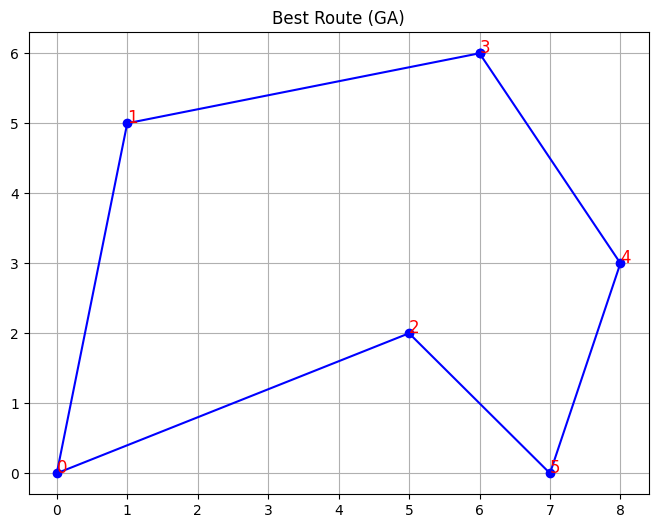

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}

N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

# Step 3: Route Cost Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[(i + 1) % N]] for i in range(N))

# Step 4: GA Parameters
POP_SIZE = 50
NUM_GENERATIONS = 200
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.2

# Step 5: GA Operators
def initial_population():
    return [random.sample(range(N), N) for _ in range(POP_SIZE)]

def selection(pop):
    candidates = random.sample(pop, TOURNAMENT_SIZE)
    return min(candidates, key=route_distance)

def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(N), 2))
    child = [-1] * N
    child[start:end] = parent1[start:end]
    fill = [city for city in parent2 if city not in child]
    pointer = 0
    for i in range(N):
        if child[i] == -1:
            child[i] = fill[pointer]
            pointer += 1
    return child

def mutate(route):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(N), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Step 6: GA Loop
population = initial_population()
best_distance_history = []

for generation in range(NUM_GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE):
        p1 = selection(population)
        p2 = selection(population)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)
    population = new_population
    best_route = min(population, key=route_distance)
    best_distance = route_distance(best_route)
    best_distance_history.append(best_distance)

# Step 7: Result
print("Best route found:", best_route)
print("Minimum distance:", route_distance(best_route))


# Optional: Visualize Best Route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='blue')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (GA)")
    plt.grid()
    plt.show()

plot_route(best_route)


# TSP With Bee Algorithm

Best route found: [1, 3, 4, 5, 2, 0]
Minimum distance: 25.17945989469863


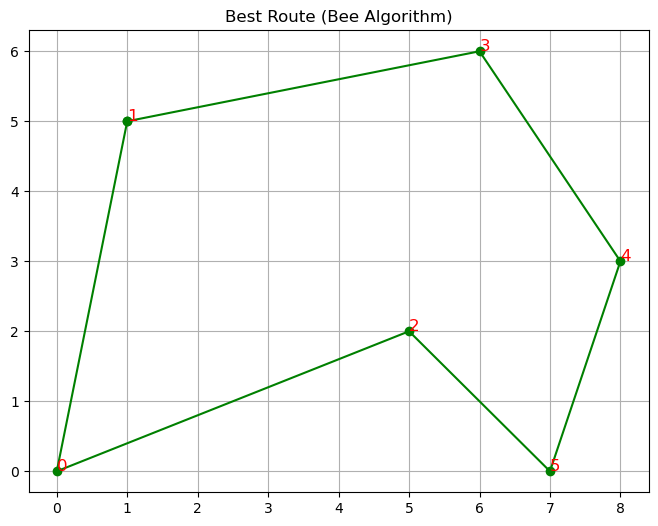

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}

N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

# Step 3: Route Distance Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[(i + 1) % N]] for i in range(N))

# Step 4: Bee Algorithm Parameters
NUM_BEES = 50
NUM_ELITE = 5
NUM_SELECTED = 15
NUM_RECRUIT_ELITE = 7
NUM_RECRUIT_SELECTED = 3
MAX_ITER = 200

# Step 5: Neighborhood Search
def neighborhood_search(route, size):
    best = route[:]
    best_cost = route_distance(best)
    for _ in range(size):
        neighbor = best[:]
        i, j = random.sample(range(N), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        cost = route_distance(neighbor)
        if cost < best_cost:
            best = neighbor
            best_cost = cost
    return best

# Step 6: Initialize Population
population = [random.sample(range(N), N) for _ in range(NUM_BEES)]
best_distance_history = []

for iteration in range(MAX_ITER):
    population.sort(key=route_distance)
    next_population = []

    # Elite sites
    for i in range(NUM_ELITE):
        bee = population[i]
        for _ in range(NUM_RECRUIT_ELITE):
            new_bee = neighborhood_search(bee, 3)
            next_population.append(new_bee)

    # Selected (non-elite) sites
    for i in range(NUM_ELITE, NUM_SELECTED):
        bee = population[i]
        for _ in range(NUM_RECRUIT_SELECTED):
            new_bee = neighborhood_search(bee, 2)
            next_population.append(new_bee)

    # Scout bees (random new solutions)
    while len(next_population) < NUM_BEES:
        next_population.append(random.sample(range(N), N))

    population = next_population
    best_bee = min(population, key=route_distance)
    best_distance_history.append(route_distance(best_bee))

# Step 7: Output
best_route = min(population, key=route_distance)
print("Best route found:", best_route)
print("Minimum distance:", route_distance(best_route))



# Visualize Best Route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='green')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (Bee Algorithm)")
    plt.grid()
    plt.show()

plot_route(best_route)


# ACO 

Best route found: [0, 2, 5, 4, 3, 1]
Minimum distance: 25.17945989469863


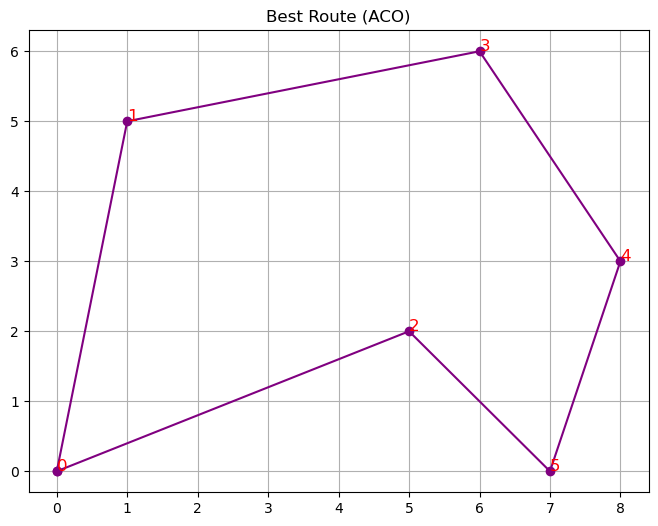

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}
N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

# Step 3: ACO Parameters
NUM_ANTS = 50
NUM_ITERATIONS = 200
ALPHA = 1         # pheromone importance
BETA = 5          # heuristic importance
EVAPORATION = 0.5
Q = 100           # pheromone deposit factor

# Initialize pheromone matrix
pheromone = np.ones((N, N))

# Heuristic information (inverse of distance)
heuristic = 1 / (distance_matrix + np.diag([1e10] * N))  # avoid division by zero

# Step 4: Route distance function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[i+1]] for i in range(N-1)) + distance_matrix[route[-1]][route[0]]

# Step 5: Construct a route for an ant
def construct_route(start_node):
    unvisited = list(range(N))
    unvisited.remove(start_node)
    route = [start_node]
    current = start_node

    while unvisited:
        probabilities = []
        for j in unvisited:
            tau = pheromone[current][j] ** ALPHA
            eta = heuristic[current][j] ** BETA
            probabilities.append(tau * eta)
        probabilities = probabilities / np.sum(probabilities)
        next_node = random.choices(unvisited, weights=probabilities)[0]
        route.append(next_node)
        unvisited.remove(next_node)
        current = next_node

    return route

# Step 6: ACO main loop
best_route = None
best_cost = float('inf')
cost_history = []

for iteration in range(NUM_ITERATIONS):
    all_routes = []
    all_costs = []

    for _ in range(NUM_ANTS):
        start = random.randint(0, N - 1)
        route = construct_route(start)
        cost = route_distance(route)
        all_routes.append(route)
        all_costs.append(cost)

        if cost < best_cost:
            best_cost = cost
            best_route = route

    # Pheromone evaporation
    pheromone *= (1 - EVAPORATION)

    # Pheromone deposit
    for route, cost in zip(all_routes, all_costs):
        for i in range(N):
            from_city = route[i]
            to_city = route[(i + 1) % N]
            pheromone[from_city][to_city] += Q / cost
            pheromone[to_city][from_city] += Q / cost

    cost_history.append(best_cost)

# Step 7: Output
print("Best route found:", best_route)
print("Minimum distance:", best_cost)



# Visualize best route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='purple')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (ACO)")
    plt.grid()
    plt.show()

plot_route(best_route)


# PSO

Best route found: [2, 5, 4, 3, 1, 0]
Minimum distance: 25.179459894698635


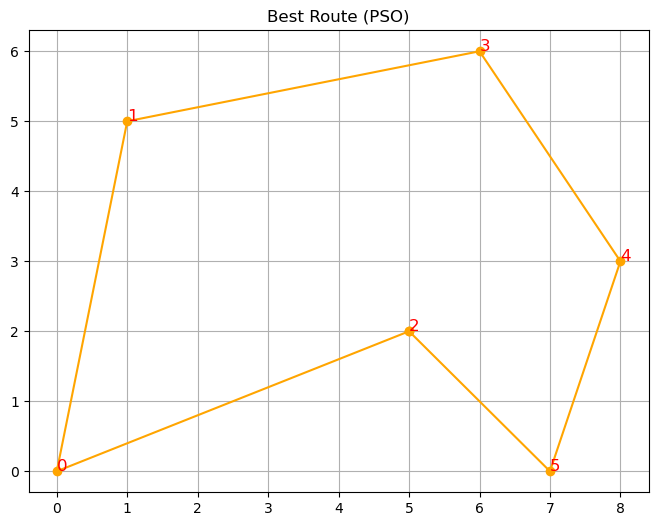

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define cities (coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}
N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

# Step 3: Route Distance Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[i+1]] for i in range(N - 1)) + distance_matrix[route[-1]][route[0]]

# Step 4: PSO Parameters
NUM_PARTICLES = 50
MAX_ITER = 200
W = 0.8        # Inertia
C1 = 1.5       # Cognitive component
C2 = 1.5       # Social component

# Particle representation
class Particle:
    def __init__(self):
        self.position = random.sample(range(N), N)
        self.velocity = []
        self.best_position = self.position[:]
        self.best_score = route_distance(self.position)

    def update_velocity(self, gbest):
        velocity = []
        for i in range(N):
            if self.position[i] != gbest[i]:
                swap_index = self.position.index(gbest[i])
                velocity.append((i, swap_index))
                # Apply swap immediately to track current position
                self.position[i], self.position[swap_index] = self.position[swap_index], self.position[i]
        self.velocity = velocity

    def apply_velocity(self):
        for (i, j) in self.velocity:
            self.position[i], self.position[j] = self.position[j], self.position[i]
        self.velocity = []

    def evaluate(self):
        cost = route_distance(self.position)
        if cost < self.best_score:
            self.best_score = cost
            self.best_position = self.position[:]

# Step 5: PSO main loop
swarm = [Particle() for _ in range(NUM_PARTICLES)]
global_best = min(swarm, key=lambda p: p.best_score)
gbest_position = global_best.best_position[:]
gbest_score = global_best.best_score
cost_history = []

for iteration in range(MAX_ITER):
    for particle in swarm:
        particle.update_velocity(gbest_position)
        particle.apply_velocity()
        particle.evaluate()

    current_best = min(swarm, key=lambda p: p.best_score)
    if current_best.best_score < gbest_score:
        gbest_position = current_best.best_position[:]
        gbest_score = current_best.best_score

    cost_history.append(gbest_score)

# Step 6: Output
print("Best route found:", gbest_position)
print("Minimum distance:", gbest_score)



# Visualize best route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='orange')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (PSO)")
    plt.grid()
    plt.show()

plot_route(gbest_position)
